# Plotting Test Data 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision.models import resnet18, ResNet18_Weights
import torch.optim as optim

from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import random

import os
import pandas as pd
from torchvision.io import read_image

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, TensorDataset

import json
import pickle

torch.backends.cudnn.deterministic = True
random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
np.random.seed(1)
batch_size = 100

# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:1" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

In [2]:
print(torch.cuda.mem_get_info(device=None))

(25055854592, 25438126080)


In [2]:
with open("Data/WSe2_sample_labels", "rb") as fp:   #Pickling
   data_sample_labels = pickle.load(fp)

train_group = data_sample_labels['train']
val_group = data_sample_labels['val']
test_group = data_sample_labels['test']

In [3]:
total_group = train_group + val_group + test_group
print(len(total_group))
print(total_group[:5])
train_sampleLabel = [item.split('_')[0] for item in train_group]
val_sampleLabel = [item.split('_')[0] for item in val_group]
test_sampleLabel = [item.split('_')[0] for item in test_group]
total_sampleLabel = [item.split('_')[0] for item in total_group]
print(total_sampleLabel[:5])

52
['MCV2-210907A-TM_210908', 'MCV2-200827A-TM_200831', 'MCV2-201201A-TM_201208', 'MCV2-200826A-TM_200831', 'MCV2-201111B-TM_201112']
['MCV2-210907A-TM', 'MCV2-200827A-TM', 'MCV2-201201A-TM', 'MCV2-200826A-TM', 'MCV2-201111B-TM']


In [4]:
#df.to_latex()
def set_mark(sampleLabel):
    if sampleLabel in train_sampleLabel:
        return 'train'
    elif sampleLabel in val_sampleLabel:
        return 'val'
    elif sampleLabel in test_sampleLabel:
        return 'test'

In [5]:
import pandas as pd



df = pd.read_csv('Data/WSe2_MCV2_parameters.csv')
print(df.keys())
sampleLabel = list(df['sampleLabel'])
materials = list(df['materials'])
T = list(df['T'])
P = list(df['P'])
time = list(df['time'])
print(len(sampleLabel))
label_count = 0
samples = []
for index, item in enumerate(total_sampleLabel):
    sample = {}
    present = 0
    for index2, item2 in enumerate(sampleLabel):
        if item == item2:
            
    #if item in sampleLabel:
            #sample['sampleLabel'] = item
            #sample['materials'] = materials[index2]
            sample['T'] = T[index2]
            sample['P'] = P[index2]
            sample['time'] = time[index2]
            sample['set'] = set_mark(item)
            samples.append(sample)
            label_count += 1
            present +=1
            break
    if present == 0:
        #sample['sampleLabel'] = item
        sample['T'] = 0
        sample['P'] = 0
        sample['time'] = 0
        sample['set'] = set_mark(item)
        samples.append(sample)
print((label_count))

print(sampleLabel[:5])

Index(['Unnamed: 0', 'sampleLabel', 'sampleId', 'materials', 'time', 'T', 'P'], dtype='object')
142
49
['MCV2-200821A-TM', 'MCV2-200821B-TM', 'MCV2-200824A-TM', 'MCV2-200825A-TM', 'MCV2-200826A-TM']


In [6]:
df0 = pd.DataFrame(samples)
df0

,T,P,time,set
0,1050.0,200.0,2100.0,train
1,1050.0,200.0,1200.0,train
2,1050.0,200.0,300.0,train
3,1050.0,200.0,1200.0,train
4,1050.0,200.0,300.0,train
5,1050.0,200.0,2400.0,train
6,1050.0,450.0,1800.0,train
7,1050.0,700.0,600.0,train
8,0.0,0.0,0.0,train
9,1050.0,200.0,0.0,train


In [7]:
idx = [item for item in range(41)]
idx.append(51)
idx2 = [item for item in range(41, 51)]
idx = idx + idx2
dfplot = df0.reindex(idx)
x = [item for item in range(1, 53)]
dfplot['x'] = x
dfplot

,T,P,time,set,x
0,1050.0,200.0,2100.0,train,1
1,1050.0,200.0,1200.0,train,2
2,1050.0,200.0,300.0,train,3
3,1050.0,200.0,1200.0,train,4
4,1050.0,200.0,300.0,train,5
5,1050.0,200.0,2400.0,train,6
6,1050.0,450.0,1800.0,train,7
7,1050.0,700.0,600.0,train,8
8,0.0,0.0,0.0,train,9
9,1050.0,200.0,0.0,train,10


/tmp/ipykernel_310270/2498475403.py:14: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "en". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  l = matplotlib.patches.Patch(facecolor=legend_facecolor[i],edgecolor =  legend_edgecolor[i], hatch=legend_hatch[i])


52


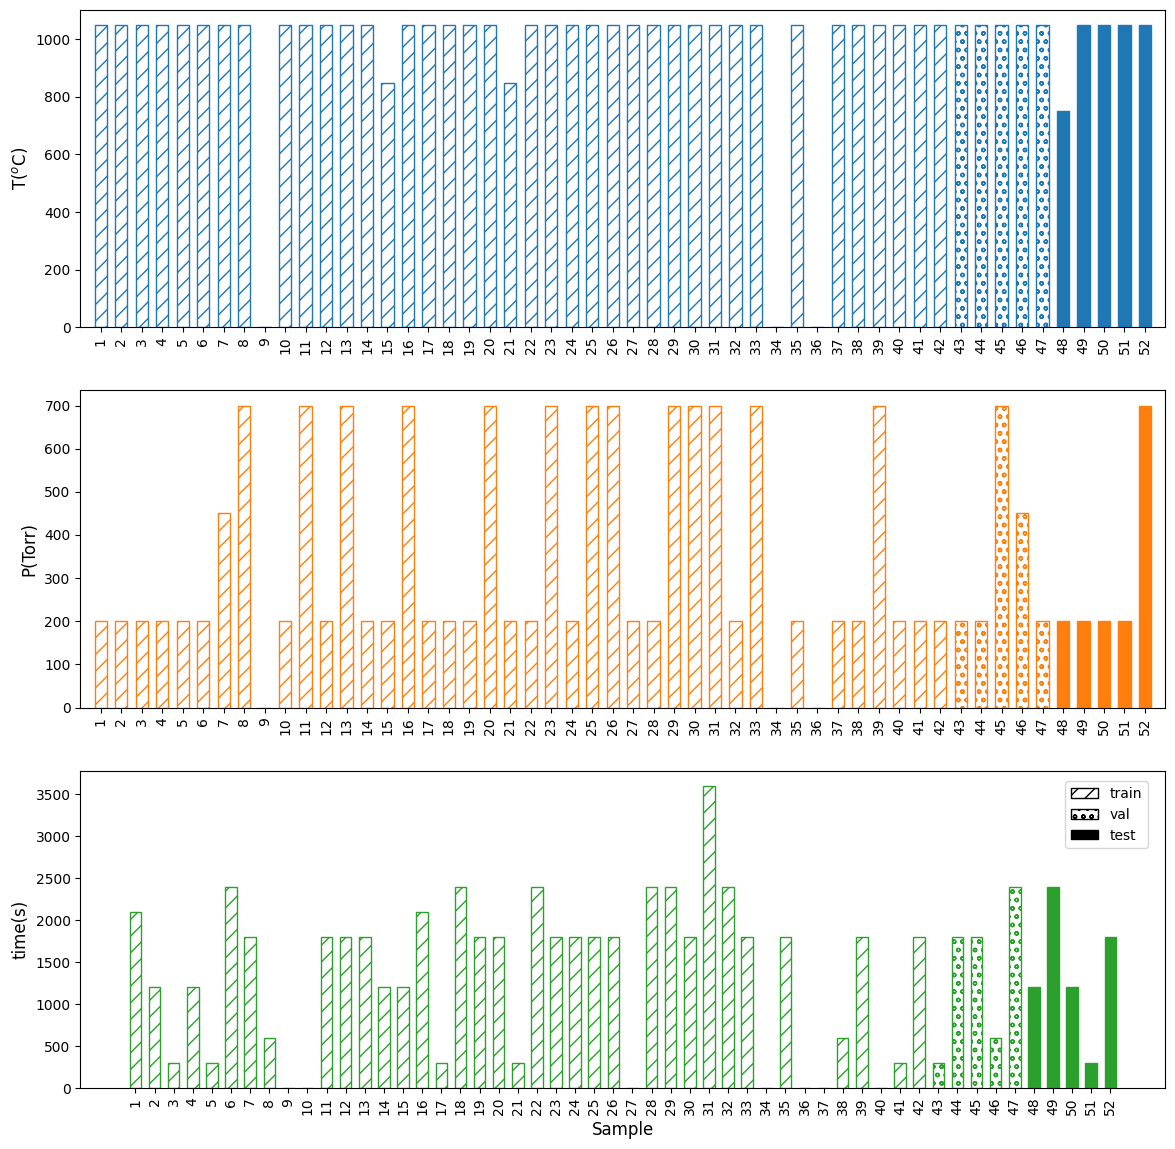

In [8]:
from pylab import *

from matplotlib import rcParams, rcParamsDefault
rcParams.update(rcParamsDefault)
#plt.rcParams['font.size'] = '12'

legend_facecolor = ['none', 'none', 'black']
legend_edgecolor = ['black', 'black', 'black' ]
legend_hatch = ['//', 'oo', 'none']
legend_label = ['train', 'val','test']
legend_artists = []
for i in range(3):
   
    l = matplotlib.patches.Patch(facecolor=legend_facecolor[i],edgecolor =  legend_edgecolor[i], hatch=legend_hatch[i])
    
    legend_artists.append(l)



hatches_dict = {0:'//', 1:'oo', 2:None}
color_dict = [{0:'none', 1:'tab:blue'}, {0:'none', 1:'tab:orange'}, {0:'none', 1:'tab:green'}]

edgecolor={"T": 'tab:blue', 'P': 'tab:orange', 'time': 'tab:green'}
hatch = []
for index in range(52):
    if index < 42:
        hatch.append(hatches_dict[0])
    elif index <47:
        hatch.append(hatches_dict[1])
    else:
        hatch.append(hatches_dict[2])
#hatch=[hatches_dict[item]for item in label_pred_match]
print(len(hatch))
colors = []
for item in color_dict:
    #print(item)
    color1 = []
    for index in range(52):
        if index < 47:
            color1.append(item[0])
        else:
            color1.append(item[1])
    colors.append(color1)

fig, ax = plt.subplots(3, 1, figsize=(14, 14)) #, sharex='col')
#ax = dfplot.plot.bar(x='x', figsize=(14, 14), subplots=True, title=['', '', ''], legend=False, hatch=hatch, color=color, edgecolor={"T": 'tab:blue', 'P': 'tab:orange', 'time': 'tab:green'})
ax[0].bar(x=dfplot['x'], height=dfplot['T'], tick_label =dfplot['x'], color=colors[0], hatch=hatch,edgecolor = 'tab:blue', width=0.6)
ax[1].bar(x=dfplot['x'], height=dfplot['P'], tick_label =dfplot['x'], color=colors[1], hatch=hatch,edgecolor = 'tab:orange', width=0.6)
ax[2].bar(x=dfplot['x'], height=dfplot['time'], tick_label =dfplot['x'], color=colors[2], hatch=hatch,edgecolor = 'tab:green', width=0.6)
plt.xticks(rotation='vertical')
#ax[0].set_xticks(rotation='vertical')
ax[0].set_ylabel('T($^o$C)', fontsize=12)
ax[1].set_ylabel('P(Torr)', fontsize=12)
ax[2].set_ylabel('time(s)', fontsize=12)
ax[0].set_xlim(0, 53)
ax[1].set_xlim(0, 53)

ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 'vertical')
ax[1].set_xticklabels(ax[1].get_xticks(), rotation = 'vertical')

plt.xlabel('Sample', position=(0.5,-25), fontsize=12)
ax[2].legend(legend_artists,legend_label, bbox_to_anchor=(0.99, 0.99), loc='upper right')#,bbox_to_anchor=(1.03, 0.89), loc='outside right upper')
plt.savefig("Results/data_set.pdf", format="pdf", bbox_inches="tight")

plt.show()

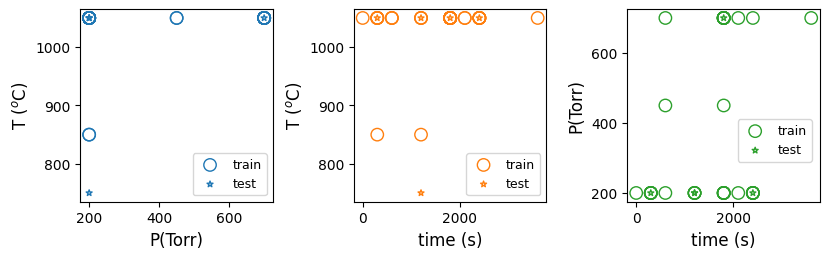

In [9]:
#Test
from sklearn.metrics import r2_score 
import matplotlib as mpl# random_state = 36
mpl.rcParams.update(mpl.rcParamsDefault) # this is to clear figure settings

import matplotlib.pyplot as plt
from matplotlib import  style

dfplot2= dfplot.drop([8, 10, 26, 33, 35, 36, 39])

fig, ax = plt.subplots(1, 3,figsize=(10, 2.5))

#rc('axes', linewidth=1.2)
plt.rcParams['font.size'] = '12'





ax[0].set_ylabel('T ($^o$C)' , fontsize=12)#, fontweight='bold')
ax[0].set_xlabel('P(Torr)' , fontsize=12)#, fontweight='bold')



ax[0].scatter( dfplot2['P'][:-5], dfplot2['T'][:-5],s=80, color='none', marker='o',edgecolor='tab:blue', label='train')
ax[0].scatter( dfplot2['P'][-5:], dfplot2['T'][-5:],s=20, color='none', marker='*',edgecolor ='tab:blue', label='test')

ax[0].set_box_aspect(1)

ax[1].set_ylabel('T ($^o$C)' , fontsize=12)#, fontweight='bold')
ax[1].set_xlabel('time (s)' , fontsize=12)#, fontweight='bold')
ax[1].scatter( dfplot2['time'][:-5], dfplot2['T'][:-5],s=80, color='none', marker='o',edgecolor='tab:orange', label='train')
ax[1].scatter( dfplot2['time'][-5:], dfplot2['T'][-5:],s=20, color='none', marker='*',edgecolor='tab:orange', label='test')
ax[1].set_box_aspect(1)

ax[2].set_ylabel('P(Torr)' , fontsize=12)#, fontweight='bold')
ax[2].set_xlabel('time (s)' , fontsize=12)#, fontweight='bold')
ax[2].scatter( dfplot2['time'][:-5], dfplot2['P'][:-5],s=80, color='none', marker='o',edgecolor='tab:green', label='train')
ax[2].scatter( dfplot2['time'][-5:], dfplot2['P'][-5:],s=20, color='none', marker='*',edgecolor='tab:green', label='test')
ax[2].set_box_aspect(1)

ax[0].legend(fontsize=9)
ax[1].legend(fontsize=9)
ax[2].legend(bbox_to_anchor=(0.99, 0.46), loc='upper right', fontsize=9)
#plt.savefig("Results/SEGI_coverage_train_val_test.png", dpi=600)
plt.savefig("Results/data_scatter.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [10]:
df1 = pd.DataFrame(samples[:26])
df2 = pd.DataFrame(samples[26:])
df = pd.concat([df1, df2], axis=1)
df

,T,P,time,set,T,P,time,set
0,1050.0,200.0,2100.0,train,1050.0,200.0,0.0,train
1,1050.0,200.0,1200.0,train,1050.0,200.0,2400.0,train
2,1050.0,200.0,300.0,train,1050.0,700.0,2400.0,train
3,1050.0,200.0,1200.0,train,1050.0,700.0,1800.0,train
4,1050.0,200.0,300.0,train,1050.0,700.0,3600.0,train
5,1050.0,200.0,2400.0,train,1050.0,200.0,2400.0,train
6,1050.0,450.0,1800.0,train,1050.0,700.0,1800.0,train
7,1050.0,700.0,600.0,train,0.0,0.0,0.0,train
8,0.0,0.0,0.0,train,1050.0,200.0,1800.0,train
9,1050.0,200.0,0.0,train,0.0,0.0,0.0,train


In [11]:
print(df.to_latex())

\begin{tabular}{lrrrlrrrl}
\toprule
{} &       T &      P &    time &    set &       T &      P &    time &    set \\
\midrule
0  &  1050.0 &  200.0 &  2100.0 &  train &  1050.0 &  200.0 &     0.0 &  train \\
1  &  1050.0 &  200.0 &  1200.0 &  train &  1050.0 &  200.0 &  2400.0 &  train \\
2  &  1050.0 &  200.0 &   300.0 &  train &  1050.0 &  700.0 &  2400.0 &  train \\
3  &  1050.0 &  200.0 &  1200.0 &  train &  1050.0 &  700.0 &  1800.0 &  train \\
4  &  1050.0 &  200.0 &   300.0 &  train &  1050.0 &  700.0 &  3600.0 &  train \\
5  &  1050.0 &  200.0 &  2400.0 &  train &  1050.0 &  200.0 &  2400.0 &  train \\
6  &  1050.0 &  450.0 &  1800.0 &  train &  1050.0 &  700.0 &  1800.0 &  train \\
7  &  1050.0 &  700.0 &   600.0 &  train &     0.0 &    0.0 &     0.0 &  train \\
8  &     0.0 &    0.0 &     0.0 &  train &  1050.0 &  200.0 &  1800.0 &  train \\
9  &  1050.0 &  200.0 &     0.0 &  train &     0.0 &    0.0 &     0.0 &  train \\
10 &  1050.0 &  700.0 &  1800.0 &  train &  1050.0 & 

/tmp/ipykernel_310270/2350534188.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


In [12]:
import pandas as pd

myfile1 = 'Results/Micro_cov.csv'
myfile2 = 'Results/Image_cov.csv'
myfile3 = 'Results/SEG18M_cov.csv'
myfile4 = 'Results/SEG18I_cov.csv'
myfile5 = 'Results/SEG50_cov.csv'
myfile6 = 'Results/SEG101_cov.csv'

pdMicro = pd.read_csv(myfile1, index_col=0)
pdImage = pd.read_csv(myfile2, index_col=0)
pdSEG18M = pd.read_csv(myfile3, index_col=0)
pdSEG18I = pd.read_csv(myfile4, index_col=0)
pdSEG50 = pd.read_csv(myfile5, index_col=0)
pdSEG101 = pd.read_csv(myfile6, index_col=0)

In [13]:
pdMicro

,sample,label,Micro_cov
0,1,0.03886,0.047846
1,2,0.04347,0.040174
2,3,0.04795,0.045306
3,4,0.03568,0.014639
4,5,0.09856,0.084480
5,6,0.17624,0.120459
6,7,0.15027,0.113358
7,8,0.44557,0.421857
8,9,0.45203,0.470451
9,10,0.40867,0.400934


In [14]:
dfall = pd.concat([pdMicro, pdImage, pdSEG18M, pdSEG18I, pdSEG50, pdSEG101], axis=1)
dfall = dfall.sort_values('label')
x = [i for i in range(1, 24)]
dfall['x'] = x
dfall

,sample,label,Micro_cov,Image_cov,SEG18M_cov,SEG18M_iou,SEG18I_cov,SEG18I_iou,SEG50_cov,SEG50_iou,SEG101_cov,SEG101_iou,x
3,4,0.03568,0.014639,0.026867,0.034669,0.920023,0.035419,0.892285,0.037206,0.898950,0.035832,0.915958,1
0,1,0.03886,0.047846,0.047953,0.051615,0.746369,0.058810,0.660758,0.058733,0.661620,0.059862,0.649043,2
1,2,0.04347,0.040174,0.046550,0.046862,0.868316,0.046507,0.899817,0.046632,0.923569,0.054347,0.798370,3
2,3,0.04795,0.045306,0.056102,0.045174,0.905535,0.042554,0.879275,0.046096,0.846167,0.051884,0.887281,4
4,5,0.09856,0.084480,0.106168,0.056984,0.534763,0.027370,0.276911,0.099478,0.927389,0.021342,0.216536,5
6,7,0.15027,0.113358,0.144989,0.099775,0.662362,0.102432,0.681164,0.112816,0.750552,0.073956,0.492119,6
5,6,0.17624,0.120459,0.159323,0.080778,0.457704,0.099784,0.565024,0.116391,0.660309,0.061167,0.347096,7
11,12,0.36275,0.324916,0.362873,0.300622,0.808016,0.218573,0.602449,0.332103,0.914285,0.051898,0.143071,8
12,13,0.39012,0.362255,0.430597,0.056337,0.144381,0.047481,0.121698,0.319573,0.819037,0.019550,0.050103,9
22,23,0.39194,0.369373,0.391651,0.242296,0.609563,0.082940,0.211220,0.353292,0.893765,0.199428,0.508839,10


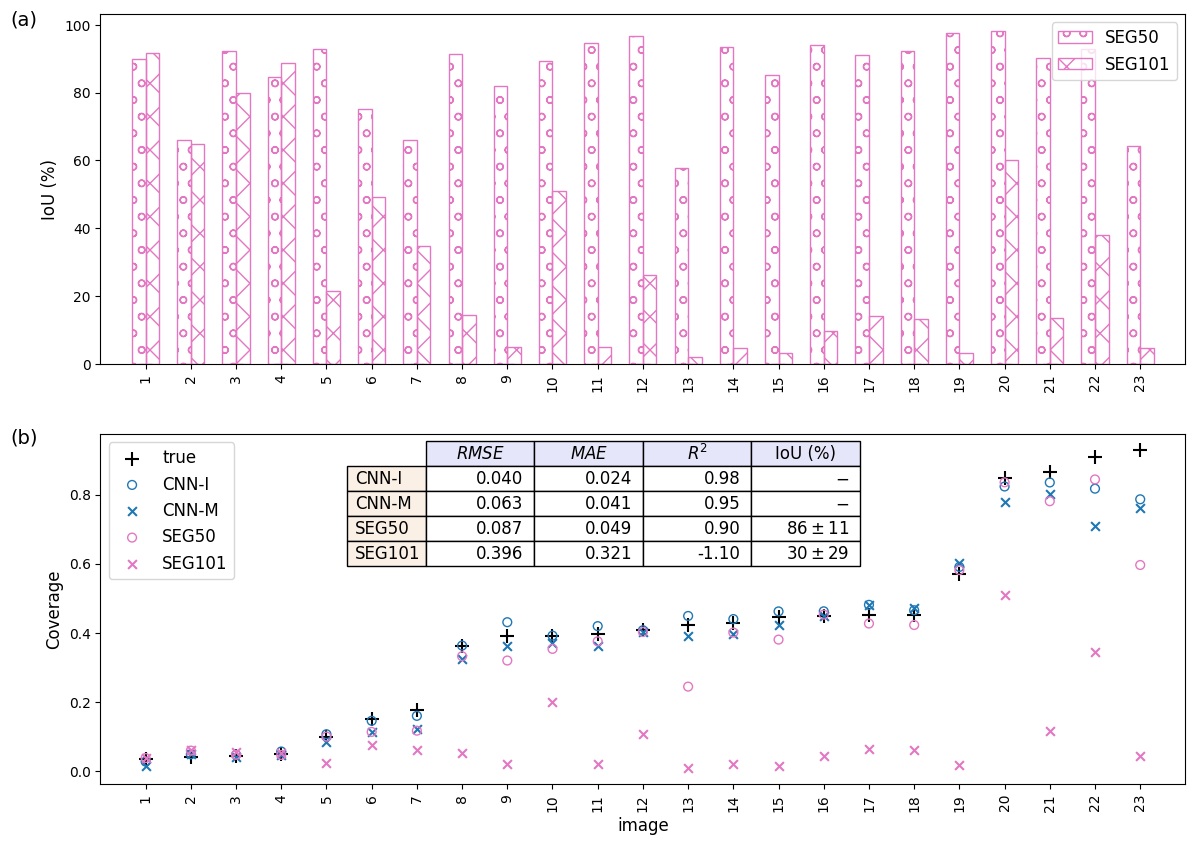

In [15]:
#Test
import numpy as np
from sklearn.metrics import r2_score 
import matplotlib as mpl# random_state = 36
mpl.rcParams.update(mpl.rcParamsDefault) # this is to clear figure settings

import matplotlib.pyplot as plt
from matplotlib import  style

fig, ax = plt.subplots(2, 1, figsize=(14, 10))

#fig, ax1 = plt.subplots(figsize=(14, 7))

#rc('axes', linewidth=1.2)
plt.rcParams['font.size'] = '12'


plt.xlabel('image' , fontsize=12)#, fontweight='bold')
plt.ylabel('Coverage' , fontsize=12)#, fontweight='bold')

ax[1].scatter(dfall['x'], dfall['label'], s=90, marker = '+', label='true', c='black')
ax[1].scatter(dfall['x'], dfall['Image_cov'], s=40, marker = 'o',label='CNN-I',c='none', edgecolor ='tab:blue')#c='tab:green')
ax[1].scatter(dfall['x'], dfall['Micro_cov'], s=40, marker = 'x', label='CNN-M', c='tab:blue')
ax[1].scatter(dfall['x'], dfall['SEG50_cov'], s=40, marker = 'o', label='SEG50', c='none', edgecolor ='tab:pink')
ax[1].scatter(dfall['x'], dfall['SEG101_cov'], s=40, marker = 'x', label='SEG101', c='tab:pink')
#ax1.scatter(dfall['x'], dfall['SEG18I_cov'], s=20, label='SEG18-I', c='tab:orange')
#ax1.scatter(dfall['x'], dfall['SEG18M_cov'], s=40, marker='x',  label='SEG18-M', c='tab:orange')
col_labels=['$RMSE$','$MAE$','$R^2$', 'IoU (%)']
row_labels=['CNN-I','CNN-M','SEG50', 'SEG101']
table_vals=[[f'{0.040:.3f}',0.024,0.98, r"$-$"],[0.063,0.041,0.95, r"$-$"],[0.087,0.049,f'{0.90:.2f}', r"$86 \pm 11$"], [0.396,0.321,f'{-1.10:.2f}', r"$30 \pm 29$"]]
rcolors = np.full(len(row_labels), 'linen')
ccolors = np.full(len(col_labels), 'lavender')
# the rectangle is where I want to place the table
the_table = ax[1].table(cellText=table_vals,
                  colWidths = [0.1]*4,
                  rowColours = rcolors,
                  colColours = ccolors,
                  rowLabels=row_labels,
                  colLabels=col_labels,
                  loc='upper center')

the_table.scale(1, 1.5)

width = 0.3
ax[0].bar(dfall['x']-0.15, dfall['SEG50_iou']*100, width, color='none', hatch='o',edgecolor ='tab:pink')
ax[0].bar(dfall['x'], [i*0 for i in range(1, 24)], width, tick_label =dfall['x'], color='none',hatch='x', edgecolor ='tab:pink')
ax[0].bar(dfall['x']+0.15, dfall['SEG101_iou']*100, width, color='none', hatch='x',edgecolor ='tab:pink')
ax[0].set_xlim(0, 24)
ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 'vertical')
plt.xticks(dfall['x'], rotation = 'vertical')
ax[0].set_ylabel('IoU (%)', fontsize=12)

plt.xlim(left=0)
plt.xlim(right=24)
#plt.grid(color='grey', axis='x', linestyle='--', linewidth=0.5)

ax[1].legend()
ax[0].legend(['SEG50', 'SEG101'])

ax[0].text(-2, 100, '(a)', fontsize=14)# fontweight = 'bold',style='italic',)
ax[1].text(-2, 0.95, '(b)',  fontsize=14)#fontweight = 'bold',style='italic',)


plt.savefig("Results/WSe2_segmentation_inference2.png", dpi=600)
plt.savefig("Results/WSe2_segmentation_inference2.pdf", format="pdf", bbox_inches="tight")
plt.show()
